In [1]:
import mlgrad.funcs as funcs
import mlgrad.cls as cls
import mlgrad.models as models
import mlgrad.loss as loss
import mlgrad.pca as pca

import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
X, Y = load_iris(return_X_y=True)
X2 = X[Y != 0]
Y2 = Y[Y != 0]
Y2[Y2==2] = -1
Y2 = Y2.astype("d")
X2_o = X2.copy()
# print(Y2)

In [3]:
# plt.scatter(X2[:,1], X2[:,2], c=Y2)
# plt.show()

0.97


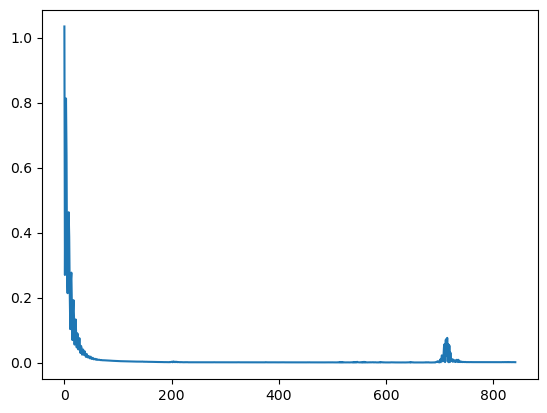

In [4]:
lm1 = models.LinearModel(4)
alg1 = cls.classification_as_regr(X2, Y2, lm1, lossfunc=loss.MarginLoss(funcs.Hinge(0.0)), h=0.1)
print(accuracy_score(Y2, np.sign(lm1.evaluate(X2))))
plt.plot(alg1.lvals)
plt.show()

In [5]:
a1 = np.asarray(lm1.param)
a1 = a1 / np.sqrt(a1[1:] @ a1[1:])
lm1.param[:] = a1
print(a1)

[ 1.799  0.118  0.330 -0.427 -0.833]


In [6]:
u1 = X2 @ a1[1:] + a1[0]
y1 = np.sign(u1)

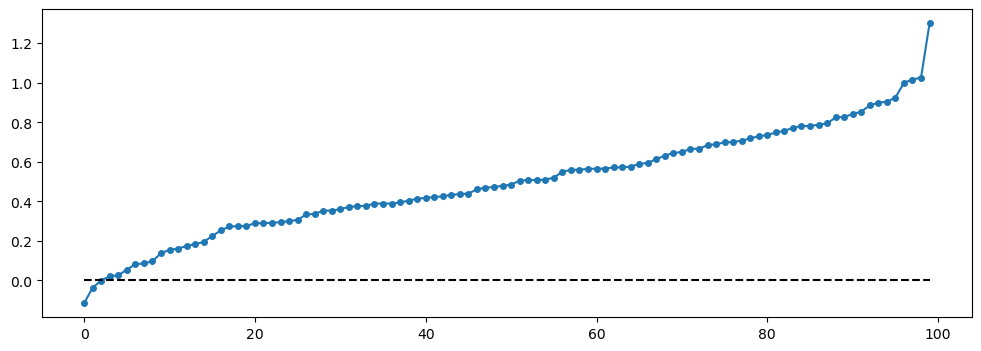

In [7]:
plt.figure(figsize=(12,4))
plt.plot(sorted(Y2*lm1.evaluate(X2)), label='s', marker='o', markersize=4)
plt.hlines(0, 0, len(Y2)-1, color='k', linestyles='--')
plt.show()

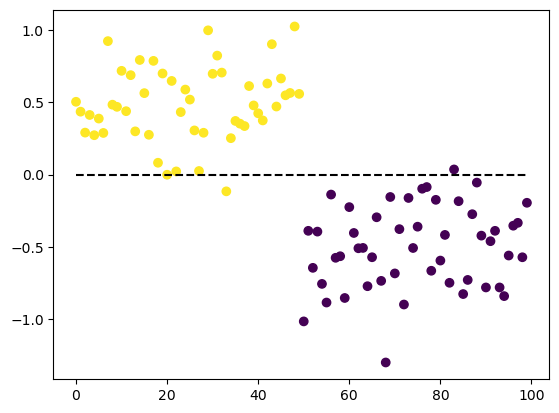

In [8]:
plt.scatter(range(len(Y2)), lm1.evaluate(X2), c=Y2)
plt.hlines(0, 0, len(Y2)-1, color='k', linestyles='--')
plt.show()

In [9]:
X2 = pca.project(X2, a1[1:])

0.87


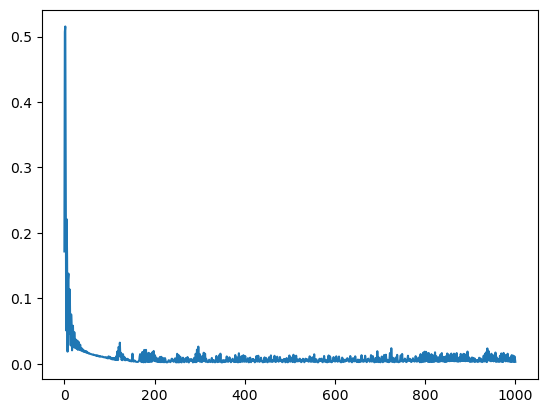

In [10]:
lm2 = models.LinearModel(4)
alg2 = cls.classification_as_regr(X2, Y2, lm2, lossfunc=loss.MarginLoss(funcs.Hinge(0.0)), h=0.1)
print(accuracy_score(Y2, np.sign(lm2.evaluate(X2))))
plt.plot(alg2.lvals)
plt.show()

In [11]:
a2 = np.asarray(lm2.param)
a2 = a2 / np.sqrt(a2[1:] @ a2[1:])
lm2.param[:] = a2
print(a2)

[ 0.960  0.201  0.192 -0.682 -0.676]


In [12]:
u2 = X2 @ a2[1:] + a2[0]
y2 = np.sign(u2)

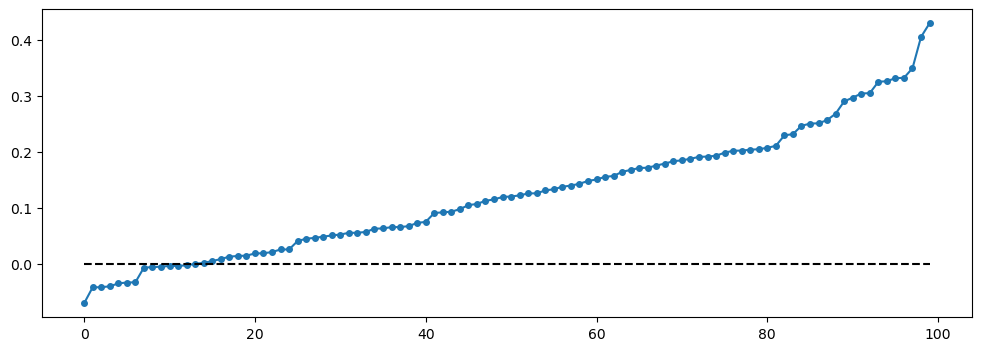

In [13]:
plt.figure(figsize=(12,4))
plt.plot(sorted(Y2*lm2.evaluate(X2)), label='s', marker='o', markersize=4)
plt.hlines(0, 0, len(Y2)-1, color='k', linestyles='--')
plt.show()

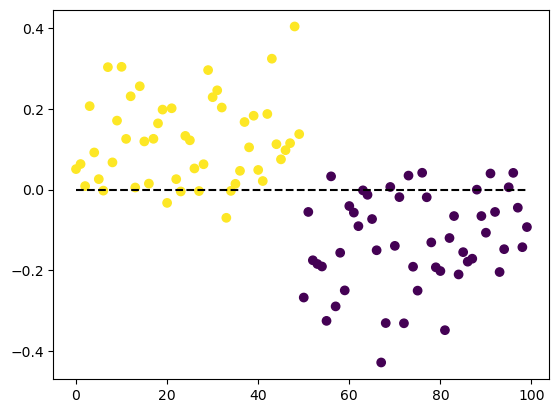

In [14]:
plt.scatter(range(len(Y2)), lm2.evaluate(X2), c=Y2)
plt.hlines(0, 0, len(Y2)-1, color='k', linestyles='--')
plt.show()

In [15]:
X2 = pca.project(X2, a2[1:])

0.89


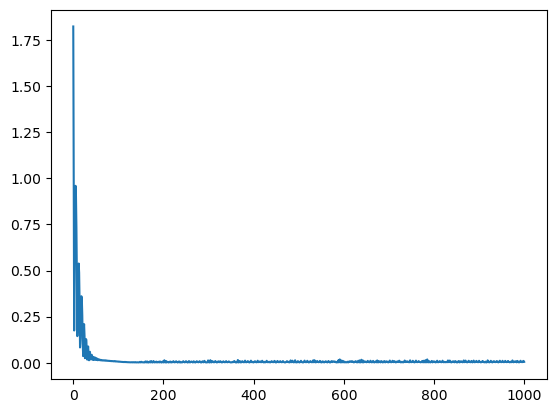

In [16]:
lm3 = models.LinearModel(4)
alg3 = cls.classification_as_regr(X2, Y2, lm3, lossfunc=loss.MarginLoss(funcs.Hinge(0.0)), h=0.1)
print(accuracy_score(Y2, np.sign(lm3.evaluate(X2))))
plt.plot(alg3.lvals)
plt.show()

In [17]:
a3 = np.asarray(lm3.param)
a3 = a3 / np.sqrt(a3[1:] @ a3[1:])
lm3.param[:] = a3
print(a3)

[ 1.931  0.273 -0.141 -0.948 -0.080]


In [18]:
u3 = X2 @ a3[1:] + a3[0]
y3 = np.sign(u3)

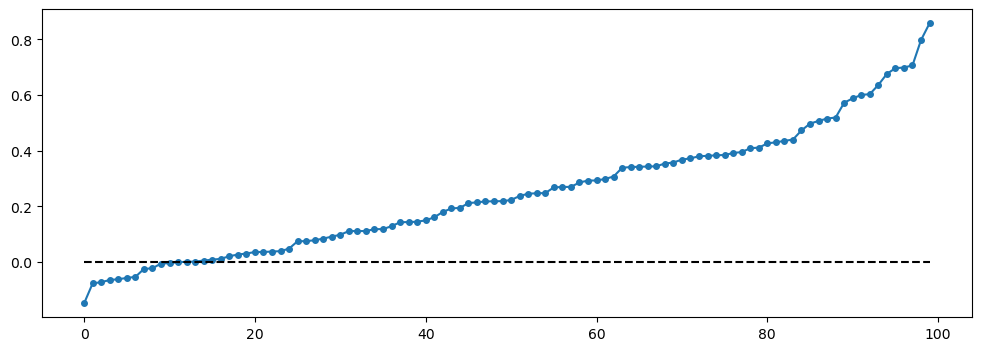

In [19]:
plt.figure(figsize=(12,4))
plt.plot(sorted(Y2*lm3.evaluate(X2)), label='s', marker='o', markersize=4)
plt.hlines(0, 0, len(Y2)-1, color='k', linestyles='--')
plt.show()

In [20]:
X2 = pca.project(X2, a3[1:])

0.87


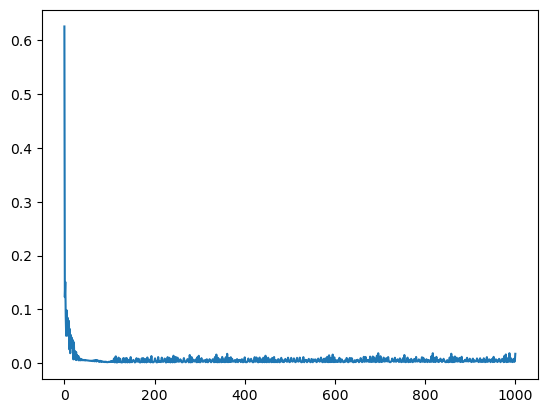

In [21]:
lm4 = models.LinearModel(4)
alg4 = cls.classification_as_regr(X2, Y2, lm4, lossfunc=loss.MarginLoss(funcs.Hinge(0.0)), h=0.1)
print(accuracy_score(Y2, np.sign(lm4.evaluate(X2))))
plt.plot(alg4.lvals)
plt.show()

In [22]:
a4 = np.asarray(lm4.param)
a4 = a4 / np.sqrt(a4[1:] @ a4[1:])
lm4.param[:] = a4
print(a4)

[ 1.981 -0.030 -0.417  0.117  0.901]


In [23]:
u4 = X2 @ a4[1:] + a4[0]
y4 = np.sign(u4)

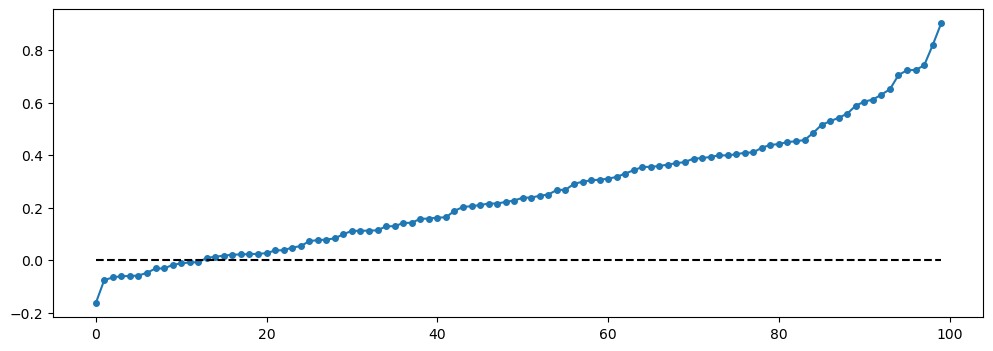

In [24]:
plt.figure(figsize=(12,4))
plt.plot(sorted(Y2*lm4.evaluate(X2)), label='s', marker='o', markersize=4)
plt.hlines(0, 0, len(Y2)-1, color='k', linestyles='--')
plt.show()

In [36]:
UU = np.c_[u1,u2,u3,u4]

In [26]:
uu1 = u1 @ u1
uu2 = u2 @ u2
uu3 = u3 @ u3
uu4 = u4 @ u4
print(uu1, uu2, uu3, uu4)

31.71397814018487 2.786453902531582 11.048265201838728 11.985021718362486


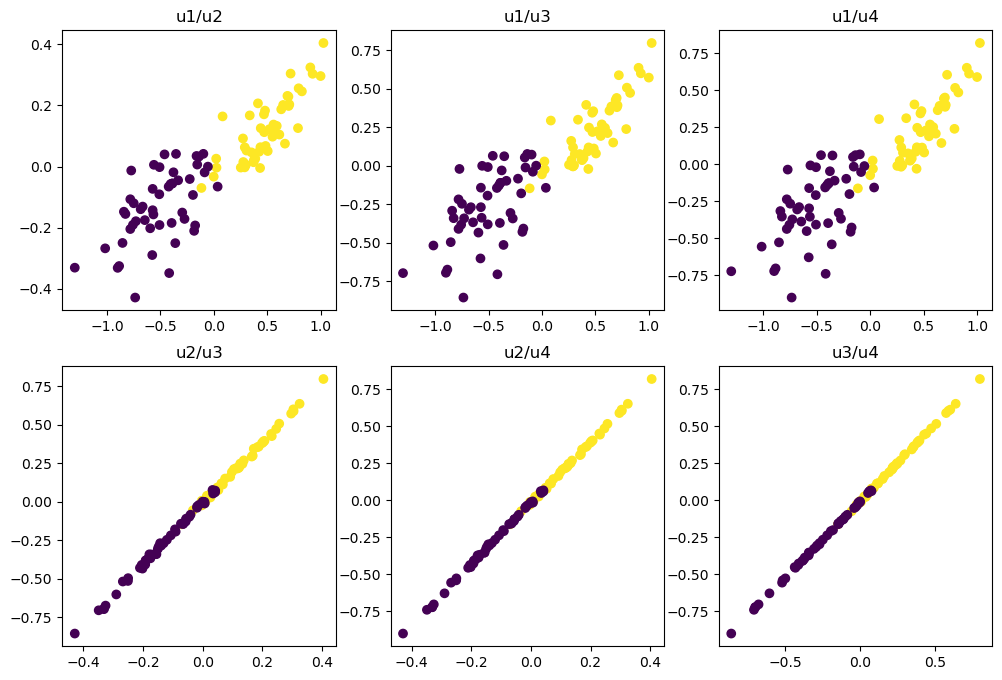

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.scatter(u1, u2, c=Y2)
plt.title("u1/u2")
plt.subplot(2,3,2)
plt.scatter(u1, u3, c=Y2)
plt.title("u1/u3")
plt.subplot(2,3,3)
plt.scatter(u1, u4, c=Y2)
plt.title("u1/u4")
plt.subplot(2,3,4)
plt.scatter(u2, u3, c=Y2)
plt.title("u2/u3")
plt.subplot(2,3,5)
plt.scatter(u2, u4, c=Y2)
plt.title("u2/u4")
plt.subplot(2,3,6)
plt.scatter(u3, u4, c=Y2)
plt.title("u3/u4")
plt.show()

In [29]:
YY = np.c_[y1,y2,y3,y4,Y2]

0.98


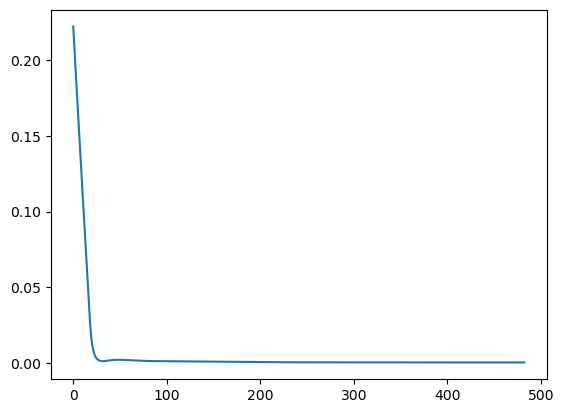

In [47]:
lm = models.LinearModel(4)
alg = cls.classification_as_regr(UU, Y2, lm, lossfunc=loss.MarginLoss(funcs.Hinge(0.0)), h=0.01)
print(accuracy_score(Y2, np.sign(lm.evaluate(UU))))
plt.plot(alg.lvals)
plt.show()